In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model
from keras.layers import GRU, Dense, Dropout
import os

df = pd.read_csv('Daten_Extraktion_V1_trendlinie1.csv')
df.head()

df = df['Absolute_Residuen_mit_NN_BWF'].values
df = df.reshape(-1, 1)
print(df.shape)
df[:75351]

dataset_train = np.array(df[:int(df.shape[0]*0.5)])
dataset_test = np.array(df[int(df.shape[0]*0.5)-50:])
print(dataset_train.shape)
print(dataset_test.shape)

(75351, 1)
(37675, 1)
(37726, 1)


In [0]:
scaler = MinMaxScaler(feature_range=(0,1))
dataset_train = scaler.fit_transform(dataset_train)
dataset_train[:5]

array([[0.34763028],
       [0.34923702],
       [0.35081639],
       [0.3523681 ],
       [0.35389185]])

In [0]:
dataset_test = scaler.transform(dataset_test)
dataset_test[:5]

array([[0.32503631],
       [0.32516313],
       [0.32528853],
       [0.3254125 ],
       [0.32553501]])

In [0]:
def create_dataset(df):
    x = []
    y = []
    for i in range(50, df.shape[0]):
        x.append(df[i-50:i, 0])
        y.append(df[i, 0])
    x = np.array(x)
    y = np.array(y)
    return x,y

In [0]:
x_train, y_train = create_dataset(dataset_train)
x_train[:1]

array([[0.34763028, 0.34923702, 0.35081639, 0.3523681 , 0.35389185,
        0.35538737, 0.35685438, 0.35829263, 0.35970187, 0.36108185,
        0.36243236, 0.36375316, 0.36504407, 0.36630488, 0.3675354 ,
        0.36873546, 0.36990491, 0.37104359, 0.37215135, 0.37322808,
        0.37427365, 0.37528795, 0.3762709 , 0.37722239, 0.37814237,
        0.37903076, 0.37988751, 0.38071257, 0.38150592, 0.38226753,
        0.38299738, 0.38369546, 0.38436179, 0.38499638, 0.38559924,
        0.38617041, 0.38670992, 0.38721783, 0.38769418, 0.38813905,
        0.3885525 , 0.38893461, 0.38928547, 0.38960517, 0.3898938 ,
        0.39015148, 0.39037832, 0.39057444, 0.39073996, 0.39087503]])

In [0]:
x_test, y_test = create_dataset(dataset_test)
x_test[:1]

array([[0.32503631, 0.32516313, 0.32528853, 0.3254125 , 0.32553501,
        0.32565605, 0.3257756 , 0.32589365, 0.32601017, 0.32612516,
        0.32623858, 0.32635043, 0.32646068, 0.32656932, 0.32667634,
        0.3267817 , 0.3268854 , 0.32698742, 0.32708774, 0.32718634,
        0.32728321, 0.32737832, 0.32747166, 0.32756322, 0.32765297,
        0.3277409 , 0.32782699, 0.32791123, 0.32799359, 0.32807407,
        0.32815264, 0.32822929, 0.32830401, 0.32837678, 0.32844758,
        0.3285164 , 0.32858322, 0.32864804, 0.32871083, 0.32877158,
        0.32883027, 0.32888691, 0.32894146, 0.32899392, 0.32904428,
        0.32909252, 0.32913863, 0.32918261, 0.32922444, 0.3292641 ]])

In [0]:
# Reshape features for LSTM Layer
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

Epoch 1/5
37625/37625 [==============================] - 207s 6ms/step - loss: 0.0206
Epoch 2/5
37625/37625 [==============================] - 204s 5ms/step - loss: 0.0142
Epoch 3/5
37625/37625 [==============================] - 203s 5ms/step - loss: 0.0122
Epoch 4/5
37625/37625 [==============================] - 204s 5ms/step - loss: 0.0108
Epoch 5/5
37625/37625 [==============================] - 205s 5ms/step - loss: 0.0105


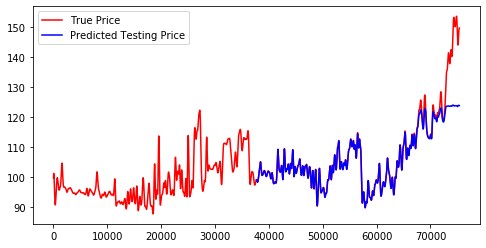

In [0]:
model = Sequential()
model.add(GRU(units=96, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(GRU(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=96, return_sequences=True))
model.add(Dropout(0.2))
model.add(GRU(units=96))
model.add(Dropout(0.2))
model.add(Dense(units=1))
model.compile(loss='mean_absolute_error', optimizer='adam')
model.fit(x_train, y_train, epochs=5, batch_size=32)
  

predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

fig, ax = plt.subplots(figsize=(8,4))
plt.plot(df, color='red',  label="True Price")
ax.plot(range(len(y_train)+50,len(y_train)+50+len(predictions)),predictions, color='blue', label='Predicted Testing Price')
plt.legend()

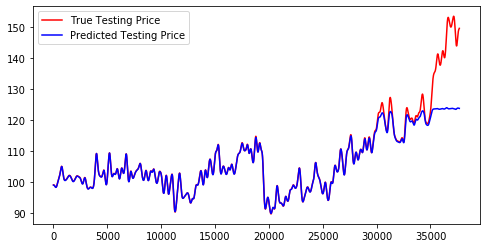

In [0]:
y_test_scaled = scaler.inverse_transform(y_test.reshape(-1, 1))

fig, ax = plt.subplots(figsize=(8,4))
ax.plot(y_test_scaled, color='red', label='True Testing Price')
plt.plot(predictions, color='blue', label='Predicted Testing Price')
plt.legend()